In [1]:
import sys
sys.path.insert(0,'../src/')
from curve import *
from utils import *
import numpy as np
from multiply_connected_pipe import *
import pickle
from matplotlib import pyplot as plt
from numpy import array as arr

In [2]:
def merging2pipe(pipes):
    curves = []
    for pipe in pipes:
        curves += pipe.curves
    i = 0
    while i < len(curves):
        if not isinstance(curves[i], Cap):
            i += 1
            continue
        for j in range(i+1,len(curves)):
            if not isinstance(curves[j], Cap):
                continue
            if np.linalg.norm(curves[i].matching_pt - curves[j].matching_pt) < 1e-8:
                curves.pop(j)
                curves.pop(i)
                break
        i += 1
    curves = [c.clean_copy() for c in curves]
    return MultiplyConnectedPipeFromCurves(curves)

def transformed(pipe,shift):
    curves = [c.transformed(shift) for c in pipe.curves]
    return MultiplyConnectedPipeFromCurves(curves)

def plyg_bdr(pipe):
    pts = []
    for c in pipe.exterior_boundary.curves:
        pts += [c.start_pt]
        if isinstance(c, Corner):
            pts += [c.mid_pt]
    
    return np.array(pts + [pts[0]]).T

def transformeds(pipes,shift): return [transformed(p,shift)  for p in pipes]
    

draw connection of a rather complicated pipe system 

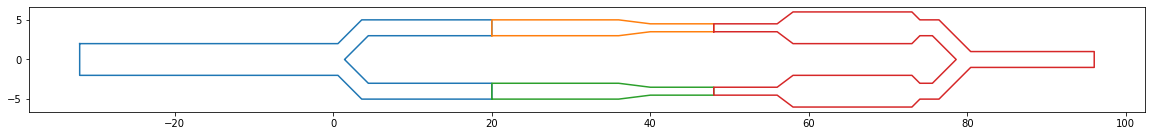

In [132]:
fig, ax = plt.subplots(figsize=(20,5))

pipe111 = NLets(arr([pt(-32,0),pt(2,-2),pt(2,2)]),np.array([2,1,1]))
pipe112 = transformed(NLets(arr([pt(-2,-2),pt(16,0)]), np.array([1,1])),pt(4,4))
pipe113 = transformed(NLets(arr([pt(16,0),pt(-2,2)]), np.array([1,1])),pt(4,-4))
pipe11 = merging2pipe([pipe111,pipe112,pipe113])


pipe12 = transformed(PipeWithDifferentRadius(16,4,8,1,0.5),pt(20,4))
pipe13 = transformed(PipeWithDifferentRadius(16,4,8,1,0.5),pt(20,-4))



pipe141 = transformed(PipeWithDifferentRadius(8,2,14,0.5,2),pt(48,4))
pipe142 = transformed(PipeWithDifferentRadius(8,2,14,0.5,2),pt(48,-4))
pipe143 = transformed(PipeWithDifferentRadius(1,1,1,2,1),pt(72,4))
pipe144 = transformed(PipeWithDifferentRadius(1,1,1,2,1),pt(72,-4))
pipe145 = transformed(NLets(arr([pt(-1,0),pt(2,-2)]),arr([1,1])),pt(76,4))
pipe146 = transformed(NLets(arr([pt(-1,0),pt(2,2)]),arr([1,1])),pt(76,-4))
pipe147 = transformed(NLets(arr([pt(-2,-2),pt(16,0), pt(-2,2)]),np.array([1,1,1])),pt(80,0))
pipe14 = merging2pipe([pipe141,pipe142,pipe143,pipe144,pipe145,pipe146,pipe147])

pipe1s = [pipe11,pipe12,pipe13,pipe14]

ax.set_aspect('equal')
ax.plot(*plyg_bdr(pipe11))
ax.plot(*plyg_bdr(pipe12))
ax.plot(*plyg_bdr(pipe13))
ax.plot(*plyg_bdr(pipe14))


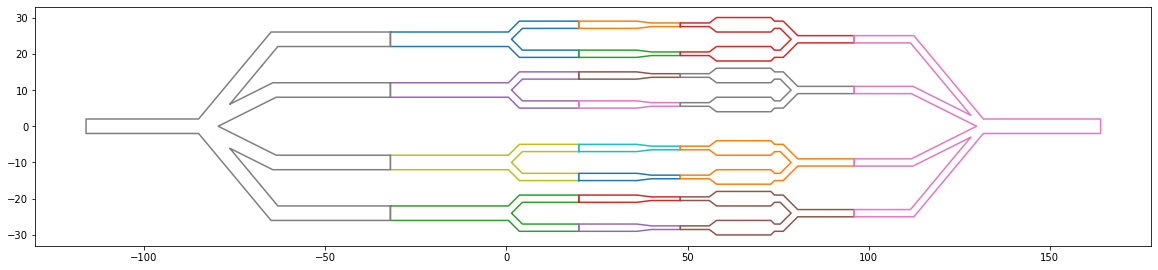

In [140]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')

pipes = transformeds(pipe1s,pt(0,24)) + transformeds(pipe1s,pt(0,10)) \
    + transformeds(pipe1s,pt(0,-10)) + transformeds(pipe1s,pt(0,-24))

pipe11 = transformed(NLets(arr([pt(-16,0),pt(5,-6)]),arr([1,1]),corner_size=0.5),pt(112,24))
pipe12 = transformed(NLets(arr([pt(-16,0),pt(5,6)]),arr([1,1]),corner_size=0.5),pt(112,-24))
pipe13 = transformed(NLets(arr([pt(-16,0),pt(2,-1)]),arr([1,1])),pt(112,10))
pipe14 = transformed(NLets(arr([pt(-16,0),pt(2,1)]),arr([1,1]),corner_size=0.5),pt(112,-10))
pipe15 = transformed(
    NLets(
        arr([pt(-18,-9),pt(-15,-18),pt(32,0),pt(-15,18),pt(-18,9)]),
        arr([1,1,2,1,1]),
        corner_size=1),
    pt(132,0)
)
pipe1 = merging2pipe([pipe11,pipe12,pipe13,pipe14,pipe15])

pipe21 = transformed(NLets(arr([pt(-5,-6),pt(32,0)]),arr([2,2]),corner_size=0.5),pt(-64,24))
pipe22 = transformed(NLets(arr([pt(-8,-4),pt(32,0),]),arr([2,2])),pt(-64,10))
pipe23 = transformed(NLets(arr([pt(32,0),pt(-8,4)]),arr([2,2])),pt(-64,-10))
pipe24 = transformed(NLets(arr([pt(32,0),pt(-5,6)]),arr([2,2]),corner_size=0.5),pt(-64,-24))
pipe25 = transformed(
    NLets(
        arr([pt(-32,0),pt(15,-18),pt(12,-6),pt(12,6),pt(15,18)]),
        arr([2,2,2,2,2]),
        ),
    pt(-84,0)
    )
pipe2 = merging2pipe([pipe21,pipe22,pipe23,pipe24,pipe25])
for pipe in pipes:
    ax.plot(*plyg_bdr(pipe))
ax.plot(*plyg_bdr(pipe1))
ax.plot(*plyg_bdr(pipe2))

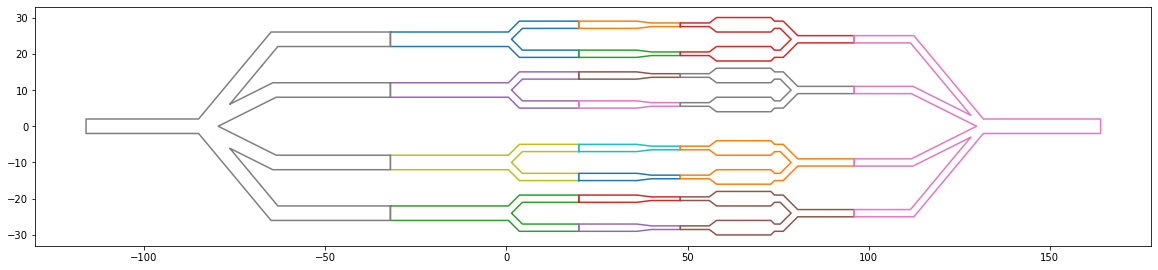

In [143]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
pipes2 = pipes + [pipe1,pipe2]
for pipe in pipes2:
    ax.plot(*plyg_bdr(pipe))

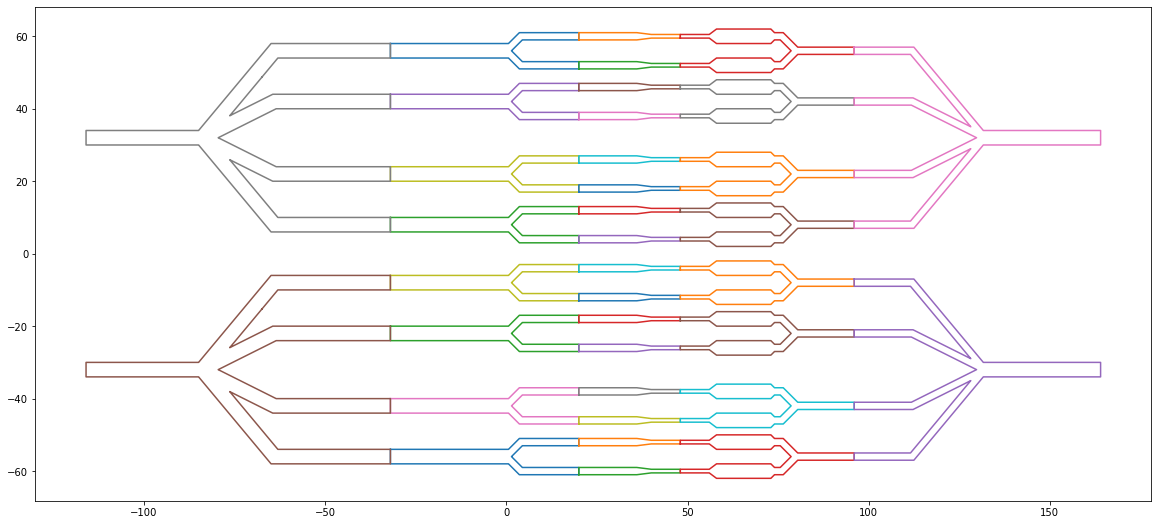

In [144]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
pipes3 = transformeds(pipes2,pt(0,32)) + transformeds(pipes2,pt(0,-32)) 

for pipe in pipes3:
    ax.plot(*plyg_bdr(pipe))
